In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import pathlib
import itertools

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [13]:
dict_characters = {1: 'NEUTROPHIL',
                   2: 'EOSINOPHIL', 3: 'MONOCYTE', 4: 'LYMPHOCYTE'}
dict_characters2 = {0: 'Mononuclear', 1: 'Polynuclear'}

labels = pd.read_csv('../input/blood-cells/dataset2-master/dataset2-master/labels.csv')
    
train_data_dir = pathlib.Path('../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN')
test_data_dir = pathlib.Path('../input/blood-cells/dataset2-master/dataset2-master/images/TEST')
image_count = len(list(train_data_dir.glob('*/*.jpeg')))
image_count

9957

In [14]:
batch_size = 64
img_height = 180
img_width = 180

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="training",
    seed=2020,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 9957 files belonging to 4 classes.
Using 7966 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=2020,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 9957 files belonging to 4 classes.
Using 1991 files for validation.


In [18]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=2020,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2487 files belonging to 4 classes.


In [19]:
class_names = train_ds.class_names
print(test_ds.class_names)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


(64, 180, 180, 3)
(64,)


In [21]:
tf.random.set_seed(
    2020
)

In [22]:
num_classes = 5

In [24]:
epochs = 200

In [25]:
model = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
# model._name = "Model"
# model.load_weights('model.h5')
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 16)       

In [26]:
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/200
125/125 [==============================] - 10s 82ms/step - loss: 1.5670 - accuracy: 0.2509 - val_loss: 1.4027 - val_accuracy: 0.2486
Epoch 2/200
125/125 [==============================] - 4s 35ms/step - loss: 1.3910 - accuracy: 0.2535 - val_loss: 1.3954 - val_accuracy: 0.2501
Epoch 3/200
125/125 [==============================] - 4s 34ms/step - loss: 1.3877 - accuracy: 0.2665 - val_loss: 1.4058 - val_accuracy: 0.2501
Epoch 4/200
125/125 [==============================] - 4s 33ms/step - loss: 1.3521 - accuracy: 0.3192 - val_loss: 1.3434 - val_accuracy: 0.2938
Epoch 5/200
125/125 [==============================] - 4s 34ms/step - loss: 1.1930 - accuracy: 0.4435 - val_loss: 1.3427 - val_accuracy: 0.3963
Epoch 6/200
125/125 [==============================] - 4s 33ms/step - loss: 1.0611 - accuracy: 0.5132 - val_loss: 1.4083 - val_accuracy: 0.3586
Epoch 7/200
125/125 [==============================] - 4s 34ms/step - loss: 0.9682 - accuracy: 0.5613 - val_loss: 1.2837 - val_accuracy

125/125 [==============================] - 4s 34ms/step - loss: 0.0991 - accuracy: 0.9640 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 114/200
125/125 [==============================] - 4s 35ms/step - loss: 0.0600 - accuracy: 0.9772 - val_loss: 0.0475 - val_accuracy: 0.9824
Epoch 115/200
125/125 [==============================] - 4s 33ms/step - loss: 0.0408 - accuracy: 0.9841 - val_loss: 0.0350 - val_accuracy: 0.9869
Epoch 116/200
125/125 [==============================] - 4s 34ms/step - loss: 0.0467 - accuracy: 0.9833 - val_loss: 0.0762 - val_accuracy: 0.9699
Epoch 117/200
125/125 [==============================] - 4s 33ms/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 0.0547 - val_accuracy: 0.9824
Epoch 118/200
125/125 [==============================] - 4s 33ms/step - loss: 0.0569 - accuracy: 0.9799 - val_loss: 0.0368 - val_accuracy: 0.9879
Epoch 119/200
125/125 [==============================] - 4s 34ms/step - loss: 0.0510 - accuracy: 0.9818 - val_loss: 0.0332 - val_accuracy:

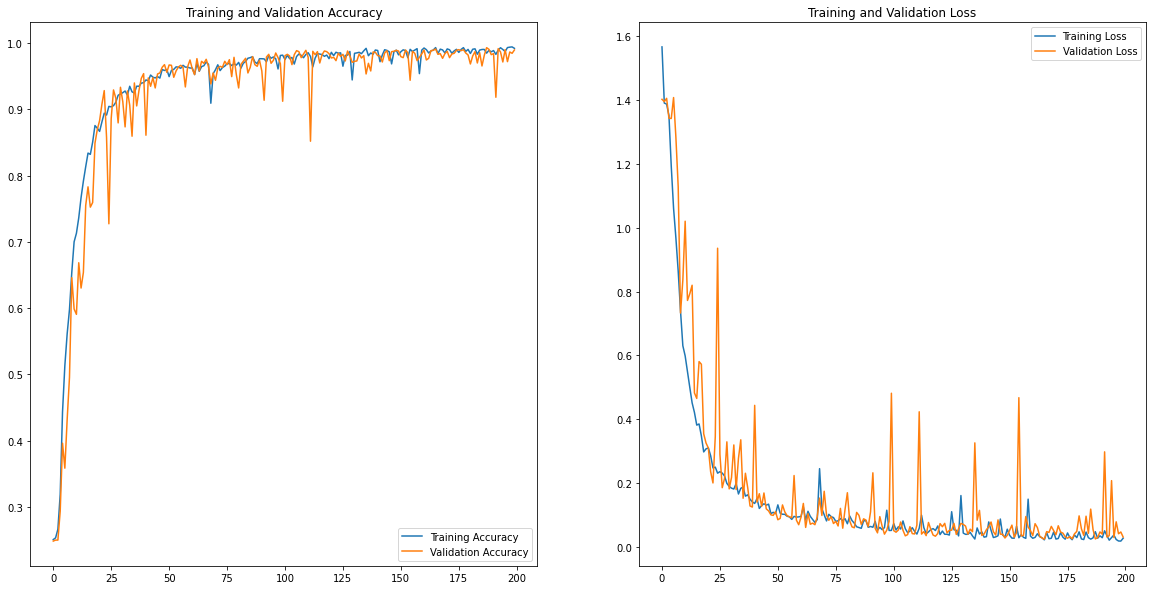

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [28]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.YlGnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=64,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predicted_classes= np.argmax(predictions, axis=1)

report = classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)
cm = confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  

Found 2487 images belonging to 4 classes.
              precision    recall  f1-score   support

  EOSINOPHIL       0.88      0.85      0.86       623
  LYMPHOCYTE       1.00      1.00      1.00       620
    MONOCYTE       1.00      0.75      0.86       620
  NEUTROPHIL       0.69      0.88      0.77       624

    accuracy                           0.87      2487
   macro avg       0.89      0.87      0.87      2487
weighted avg       0.89      0.87      0.87      2487



Confusion matrix, without normalization


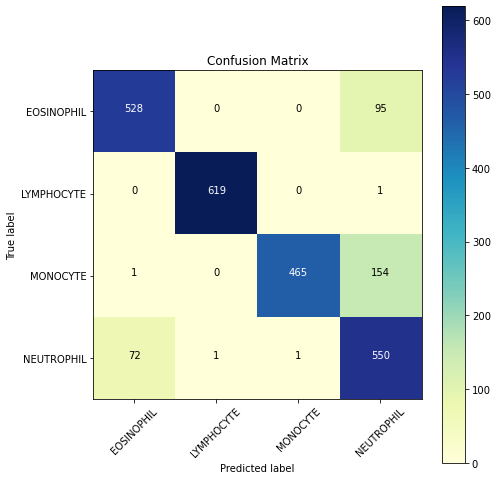

In [30]:
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cm=cm, classes=class_labels, title='Confusion Matrix')

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)


In [ ]:
model.get_config()

In [32]:
model.save_weights('model.h5')

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
#         print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        plt.figure(figsize=(10, 20))

        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]

            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.savefig(str(filters.shape[3])+".jpg")
        plt.show()


In [ ]:
img_path='../input/blood-cells/dataset-master/dataset-master/JPEGImages/BloodImage_00100.jpg'
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)#Load the input image
img = load_img(img_path, target_size=(180, 180))# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)# Rescale by 1/255
x /= 255.0# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )